# Titanic - Machine Learning from Disaster

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4f/Titanic_the_sinking.jpg">

An attempt to predict survival inspired by the Kaggle challenge with the Titanic dataset. The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. I have taken inspiration and ideas from tutorials on YouTube, Kaggle and DataCamp as one of my first attempts at machine learning. This is also a first project to practice with pandas, seaborn, scikit-learn and statistical analysis.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

train = pd.read_csv("https://www.dropbox.com/s/1xyc3klpx2mtrqf/train.csv?dl=1")
test = pd.read_csv("https://www.dropbox.com/s/7n7k0f676i6nbng/test.csv?dl=1")

<a id='preprocessing'></a>
## Preparing the Data

In order to use computational analysis and machine learning, the categorical variables will need to be transformed into numeric ones, and all missing data must be dealt with to avoid gaps. I will first use a decision tree algorithm then a random forest algorithm. I may then add more variables via feature engineering to see if that increases the accuracy of prediction.

### Missing Data

Handling the 177 missing ages - this is a significant amount of missing values.

Strategies:
<li> Remove the rows with missing ages - but would lose a chunk of the data
<li> Set NaN to either 0 or a new category
<li> Replace NaN with the average/mean value
<li> Create a machine learning algorithm to find the missing values (best option but complex)
    <li> Take other variables pclass, sex, fare, ticket, embarked to predict age 

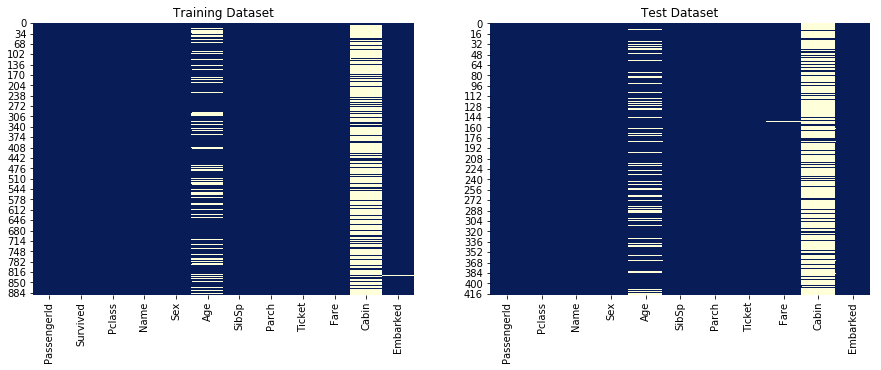

In [32]:
# visualise the missing data
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.heatmap(train.isnull(), cbar=False, ax=axes[0], cmap="YlGnBu_r").set_title("Training Dataset")
sns.heatmap(test.isnull(), cbar=False, ax=axes[1], cmap="YlGnBu_r").set_title("Test Dataset");

In [33]:
# impute the missing ages with the mean age of 29 in the training dataset
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Age'].shape

(891,)

In [34]:
# embarked = S (644) C (168) Q (77)
# impute the two missing values in 'Embarked' with 'S' in the training dataset
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].shape

(891,)

In [47]:
# impute the missing ages with the mean age of 29 in the test dataset
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Age'].shape

(418,)

In [48]:
# impute the missing value from Fare with the median in the test dataset
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Fare'].shape

(418,)

### Converting Categorical to Numerical

In [40]:
# convert the male and female groups to integer form    male = 0  female = 1
# logic is df rows in df column sex equal male set sex column to 0
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# convert the embarked values to integer form in the training dataset   S = 0   C = 1   Q = 2
train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [49]:
# convert male and female to integer in the test dataset  male = 0  female = 1
test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
# convert the embarked values to integer form in the test dataset   S = 0   C = 1   Q = 2
test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


## Decision Tree Classifier

Now the data is prepared, the first algorithm can be used with a number of these variables to output a score. The DecisionTreeClassifier from scikit-learn (tree) can be used to create tree objects. This will be created from numpy arrays. 

Required:
<li>target: (one-dimensional numpy array containing the target/response from the train data (Survived).</li>
<li>features: (a multi-dimensional numpy array containing the features/predictors from the train data (Sex, Age etc.)

To control for overfitting, a less complex model can be created from max_depth (determining when the splitting up of the decision tree stops) and min_samples_split (which monitors the amount of observations in a bucket).

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/ID3_algorithm_decision_tree.png">

In [77]:
from sklearn import tree

# Create the target and features numpy arrays: 
target = train['Survived'].values
features = train[['Pclass', 'Sex', 'Age', 'Fare']].values

# Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier(max_depth=10, min_samples_split = 5, random_state=1)
my_tree_one = my_tree_one.fit(features, target)

# Look at the importance and score of the included features
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features, target))

[0.16391012 0.42955637 0.17528458 0.23124893]
0.898989898989899


In [72]:
# making the prediction - first extract test features
test_features = test[['Pclass', 'Sex', 'Age', 'Fare']].values

# make prediction using the test dataset
prediction = my_tree_one.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId = np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
my_solution.head()

,Survived
892,0
893,0
894,0
895,0
896,1


In [ ]:
# export output of Decision Tree to CSV file
my_solution.to_csv("prediction.csv", columns=['Survived'])

## Random Forest Classifier

A commonly used machine learning technique is Random Forests, a very basic diagram is below to show how these work. Simply, the Random Forest technique handles the overfitting problem that Decision Trees faced. It grows multiple (very deep) classification trees using the training set.

At the time of prediction, each tree is used to come up with a prediction and every outcome is counted as a vote. For example, if you have trained 3 trees with 2 saying a passenger in the test set will survive and 1 says he will not, the passenger will be classified as a survivor. This approach of overtraining trees, but having the majority's vote count as the actual classification decision, avoids overfitting. 

<i>Source: DataCamp Course (Kaggle Python Tutorial on Machine Learning)</i>

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png">

Required:
<li>target: (one-dimensional numpy array containing the target/response from the train data (Survived).</li>
<li>features: (a multi-dimensional numpy array containing the features/predictors from the train data (Sex, Age etc.)</li>

Building a random forest in Python looks almost the same as building a decision tree. There are two key differences, however. Firstly, a different class is used. And second, a new argument is necessary. Also, we need to import the necessary library from scikit-learn.


<li>Use RandomForestClassifier() class instead of the DecisionTreeClassifier() class.</li>
<li>n_estimators needs to be set when using the RandomForestClassifier() class. This argument allows you to set the number of trees you wish to plant and average over.</li>

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# select variables
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# build and fit the random_forest
random_forest = RandomForestClassifier(max_depth = 10, min_samples_split = 2, n_estimators = 100, random_state = 1)
forest = random_forest.fit(features_forest, target)

# print the score of the fitted random forest
print(forest.score(features_forest, target))

0.9382716049382716


In [140]:
# making the prediction - first extract test features
features_forest_test = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# make prediction using the test dataset
prediction_forest = forest.predict(features_forest_test)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId = np.array(test["PassengerId"]).astype(int)
forest_solution = pd.DataFrame(prediction_forest, PassengerId, columns = ["Survived"])
forest_solution.head()

,Survived
892,0
893,0
894,0
895,0
896,1


In [143]:
# export Random Forest solution to CSV file
forest_solution.to_csv("randomforest_submission.csv", columns=['Survived'])

The submission to Kaggle for the Titanic competition resulted in a 74% accuracy. This is an excellent start, next I will try to learn and implement feature engineering to create new variables. This may increase the accuracy of the algorithm.

## Feature Importances

A useful feature of both Decision Trees and Random Forests is understanding .feature_importances_ attribute to interpret the relevance of the included variables. This also allows comparison of models by using the .score() method taking the features data and the target vector and computing a mean accuracy of the model. The measure should be high but not extreme because that would overfitting. This is useful for selecting predictive variables where a dataset has hundreds and hundreds of variables.

In [81]:
forest.feature_importances_

array([0.10629454, 0.20494111, 0.31984685, 0.24037915, 0.0540517 ,
       0.0401889 , 0.03429775])

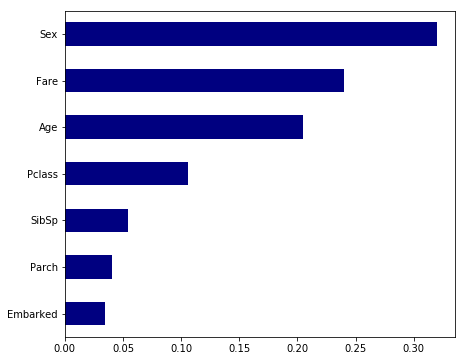

In [133]:
feature_importances = pd.Series(forest.feature_importances_, index=["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"])
feature_importances.sort_values(ascending=True).plot(kind="barh", color="navy", figsize=(7,6));

In [106]:
#Compute and print the mean accuracy score for both models
print(my_tree_one.score(features, target))
print(forest.score(features_forest, target))

0.898989898989899
0.9382716049382716


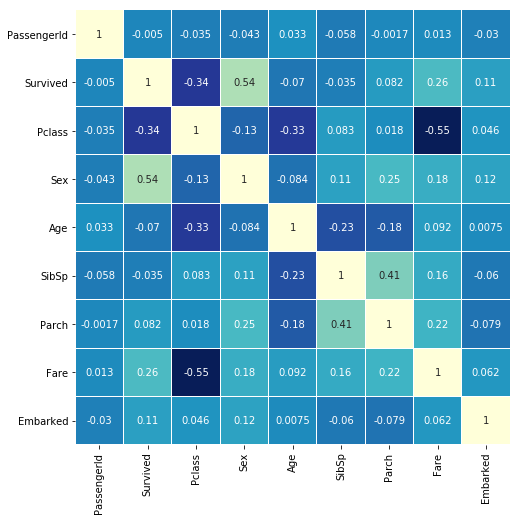

In [124]:
# when all variables have been converted to numeric at the start of an analysis
# a heatmap can quickly show some correlation of important variables
plt.figure(figsize=(10,8))
tc = train.corr()
sns.heatmap(tc, linewidths=0.1, square=True, linecolor='white', annot=True, cbar=False, cmap="YlGnBu_r");